## Time series en Pandas

- Pandas tiene los objetos ``Timestamp`` que combinan la facilidad de  ``datetime`` y ``dateutil`` con una implementación vectorizada eficiente.

- Usando los objetos ``Timestamp``, pandas construye un ``DatetimeIndex``  para ser usado como índice en ``Series`` o ``DataFrame``.

- Las clases de Pandas para series temporales son:

    * ``Timestamp``: reemplazo de ``datetime``, basado en el sistema más eficiente de ``numpy.datetime64``. La estructura del índice asociada será ``DatetimeIndex``.
    * ``Period``: para periodos de tiempo. La estructura del índice asociado es ``PeriodIndex``.
    * ``Timedelta``: para variación de tiempo o duración (más eficiente que ``datetime.timedelta``). La estructura del índice asociado es ``TimedeltaIndex``.

- Los tipos más básicos son ``Timestamp`` y ``DatetimeIndex``.

- La forma más común de crear objetos de este tipo es usando la función ``pd.to_datetime()`` .

- Puede parsear una gran variedad de formatos.
 
- Pasar una fecha a esta función produce un ``Timestamp``; pasar una serie de fechas por defecto devuelve un ``DatetimeIndex``:

In [4]:
#! pip install datetime
from datetime import datetime, date, time, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
power_data = pd.read_csv("data/Power_consumption.csv")

In [43]:
power_data.head(5)

,Date,Time,Consumption,Wind,Solar
0,2006-01-01,16:34:01.310990,1069.184,NaN,NaN
1,2006-01-02,17:34:01.310990,1380.521,NaN,NaN
2,2006-01-03,18:34:01.310990,1442.533,NaN,NaN
3,2006-01-04,19:34:01.310990,1457.217,NaN,NaN
4,2006-01-05,20:34:01.310990,1477.131,NaN,NaN


In [44]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Time         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
dtypes: float64(3), object(2)
memory usage: 171.3+ KB


In [45]:
power_data.index

RangeIndex(start=0, stop=4383, step=1)

In [46]:
power_data['Date'] = pd.to_datetime(power_data['Date'])
power_data['Time'] = pd.to_datetime(power_data['Time'])
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Time         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 171.3 KB


In [47]:
# Extract the Day, Month and Year
# Year
power_data['year'] = power_data.Date.dt.year
# Month
power_data['month'] = power_data.Date.dt.month
# Day
power_data['day'] = power_data.Date.dt.day

In [48]:
power_data = pd.read_csv("data/Power_consumption.csv")

In [49]:
power_data['Datetime'] = pd.to_datetime(power_data['Date'] + ' ' + power_data['Time'])
power_data = power_data.set_index('Datetime')
power_data.index

DatetimeIndex(['2006-01-01 16:34:01.310990', '2006-01-02 17:34:01.310990',
               '2006-01-03 18:34:01.310990', '2006-01-04 19:34:01.310990',
               '2006-01-05 20:34:01.310990', '2006-01-06 21:34:01.310990',
               '2006-01-07 22:34:01.310990', '2006-01-08 23:34:01.310990',
               '2006-01-09 00:34:01.310990', '2006-01-10 01:34:01.310990',
               ...
               '2017-12-22 21:34:01.310990', '2017-12-23 22:34:01.310990',
               '2017-12-24 23:34:01.310990', '2017-12-25 00:34:01.310990',
               '2017-12-26 01:34:01.310990', '2017-12-27 02:34:01.310990',
               '2017-12-28 03:34:01.310990', '2017-12-29 04:34:01.310990',
               '2017-12-30 05:34:01.310990', '2017-12-31 06:34:01.310990'],
              dtype='datetime64[ns]', name='Datetime', length=4383, freq=None)

In [50]:
power_data_dates

,Consumption,Wind,Solar
Date_Time,,,
2006-01-01 16:34:01.310990,1069.18400,NaN,NaN
2006-01-02 17:34:01.310990,1380.52100,NaN,NaN
2006-01-03 18:34:01.310990,1442.53300,NaN,NaN
2006-01-04 19:34:01.310990,1457.21700,NaN,NaN
2006-01-05 20:34:01.310990,1477.13100,NaN,NaN
...,...,...,...
2017-12-27 02:34:01.310990,1263.94091,394.507,16.530
2017-12-28 03:34:01.310990,1299.86398,506.424,14.162
2017-12-29 04:34:01.310990,1295.08753,584.277,29.854


In [53]:
power_data_dates = pd.read_csv('data/Power_consumption.csv', parse_dates = [['Date','Time']], index_col = 0)

In [54]:
power_data_dates

,Consumption,Wind,Solar
Date_Time,,,
2006-01-01 16:34:01.310990,1069.18400,NaN,NaN
2006-01-02 17:34:01.310990,1380.52100,NaN,NaN
2006-01-03 18:34:01.310990,1442.53300,NaN,NaN
2006-01-04 19:34:01.310990,1457.21700,NaN,NaN
2006-01-05 20:34:01.310990,1477.13100,NaN,NaN
...,...,...,...
2017-12-27 02:34:01.310990,1263.94091,394.507,16.530
2017-12-28 03:34:01.310990,1299.86398,506.424,14.162
2017-12-29 04:34:01.310990,1295.08753,584.277,29.854


In [52]:
power_data_dates.index

DatetimeIndex(['2006-01-01 16:34:01.310990', '2006-01-02 17:34:01.310990',
               '2006-01-03 18:34:01.310990', '2006-01-04 19:34:01.310990',
               '2006-01-05 20:34:01.310990', '2006-01-06 21:34:01.310990',
               '2006-01-07 22:34:01.310990', '2006-01-08 23:34:01.310990',
               '2006-01-09 00:34:01.310990', '2006-01-10 01:34:01.310990',
               ...
               '2017-12-22 21:34:01.310990', '2017-12-23 22:34:01.310990',
               '2017-12-24 23:34:01.310990', '2017-12-25 00:34:01.310990',
               '2017-12-26 01:34:01.310990', '2017-12-27 02:34:01.310990',
               '2017-12-28 03:34:01.310990', '2017-12-29 04:34:01.310990',
               '2017-12-30 05:34:01.310990', '2017-12-31 06:34:01.310990'],
              dtype='datetime64[ns]', name='Date_Time', length=4383, freq=None)

### Generando rangos de fechas

| Code   | Description         |
|--------|---------------------|
| ``D``  | Calendar day        |
| ``B``  | Business day        |
| ``W``  | Weekly              |       
| ``M``  | Month end           | 
|``BM`` | Business month end   |
| ``Q``  | Quarter end         |
| ``BQ`` | Business quarter end|
| ``A``  | Year end            | 
|``BA`` | Business year end    |
| ``H``  | Hours               |
|``BH`` | Business hours       |
| ``T`` o ``min`` | Minutes             |       
| ``S``  | Seconds             |       
| ``L``  | Milliseonds         |       
| ``U``  | Microseconds        |     
| ``N``  | nanoseconds         |       

- Las frecuencias mensual, trimestral y anual se proporcionan como fecha al final del periodo especificado.
- Añadiendo una 'S' al final de cada una de estas, la salida será al inicio del periodo.

| Code    | Description            |
|---------|------------------------|
| ``MS``  | Month start            |
| ``QS``  | Quarter start          |
| ``AS``  | Year start             |
|``BMS``  | Business month start   |
|``BQS``  | Business quarter start |
|``BAS``  | Business year start    |

- Además se puede cambiar el mes usado en frecuencias trimestrales o anuales añadiendo un código de tres letras al final:
 * ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
 * ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Generamos un rango de fechas dando fecha de inicio y final. Por defecto genera una serie diaria

In [4]:
start = datetime(2021, 1, 1)
end = datetime(2022, 1, 1)

index = pd.date_range(start, end)
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

Generar los días laborables

In [5]:
index_b = pd.bdate_range(start, end)
index_b

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

Serie mensual compuesta de 1000 meses. Por defecto genera el último día de cada mes

In [6]:
pd.date_range(start, periods=1000, freq="M")

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31',
               ...
               '2103-07-31', '2103-08-31', '2103-09-30', '2103-10-31',
               '2103-11-30', '2103-12-31', '2104-01-31', '2104-02-29',
               '2104-03-31', '2104-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')

Si queremos el primer día de cada mes

In [7]:
pd.date_range(start, periods=1000, freq="BM")

DatetimeIndex(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29',
               ...
               '2103-07-31', '2103-08-31', '2103-09-28', '2103-10-31',
               '2103-11-30', '2103-12-31', '2104-01-31', '2104-02-29',
               '2104-03-31', '2104-04-30'],
              dtype='datetime64[ns]', length=1000, freq='BM')

Horas laborables

In [56]:
diarios_df = pd.DataFrame(index=pd.date_range(start, periods=36, freq='BH'))
diarios_df.head(10)

""
2021-01-01 09:00:00
2021-01-01 10:00:00
2021-01-01 11:00:00
2021-01-01 12:00:00
2021-01-01 13:00:00
2021-01-01 14:00:00
2021-01-01 15:00:00
2021-01-01 16:00:00
2021-01-04 09:00:00
2021-01-04 10:00:00


### __Facilidades de fechas en pandas:__

Leemos el fichero con datos de niveles de NO $_{2}$

In [29]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=["datetime"])
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [22]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

Podemos asignar cada fila a un mes o a la semana etc

In [57]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality["week"] = air_quality["datetime"].dt.week
air_quality.head()

/tmp/ipykernel_3628/34351876.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  air_quality["week"] = air_quality["datetime"].dt.week


,city,country,datetime,location,parameter,value,unit,month,week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,25
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,25
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,25
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,25
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,25


Podemos calcular estadísticas basadas en la fecha, por ejemplo calcular datos por día de la semana

In [70]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Podemos dibujar la concentración de NO $_{2}$ para cada hora

Text(0.5, 1.0, 'Concentración NO2')

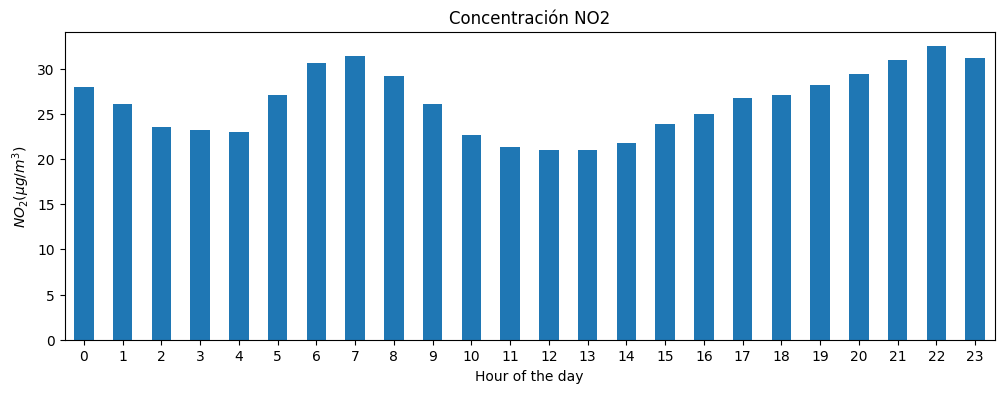

In [39]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs)

plt.xlabel("Hour of the day");  # custom x label using matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

plt.title('Concentración NO2')

## Índice Datetime 

Vamos a generar un DataFRame con una columna por localización y un índice DatetimeIndex

In [59]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [63]:
no_2.index.min(), no_2.index.max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [64]:
no_2['2019-05']

/tmp/ipykernel_3628/2102109373.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  no_2['2019-05']


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-05-31 19:00:00+00:00,NaN,23.3,33.0
2019-05-31 20:00:00+00:00,NaN,37.0,33.0
2019-05-31 21:00:00+00:00,NaN,60.2,31.0


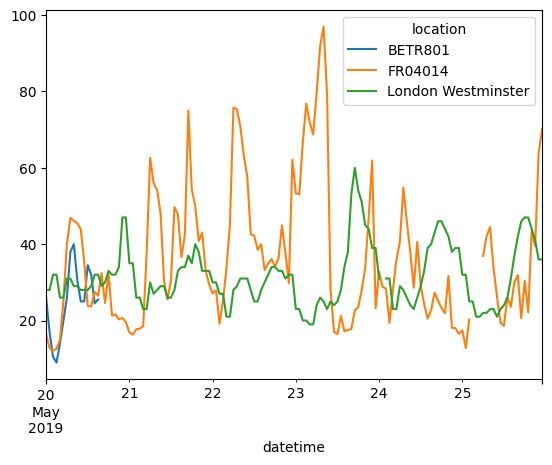

In [71]:
no_2.loc["2019-05-20":"2019-05-25"].plot();

### Time Series con índices duplicados

In [5]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [6]:
dup_ts.index.is_unique

False

In [7]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

- Para eliminarlos podemos agrupar por nivel 0 y realizar una operación que los unifique.

In [8]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [9]:
grouped.first()

2000-01-01    0
2000-01-02    1
2000-01-03    4
dtype: int64

In [10]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Date Offsets

In [11]:
from pandas.tseries.offsets import Hour, Minute

In [12]:
rango = pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')
rango

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [14]:
rango + Hour(2) + Minute(30)

DatetimeIndex(['2000-01-01 02:30:00', '2000-01-01 06:30:00',
               '2000-01-01 10:30:00', '2000-01-01 14:30:00',
               '2000-01-01 18:30:00', '2000-01-01 22:30:00',
               '2000-01-02 02:30:00', '2000-01-02 06:30:00',
               '2000-01-02 10:30:00', '2000-01-02 14:30:00',
               '2000-01-02 18:30:00', '2000-01-02 22:30:00',
               '2000-01-03 02:30:00', '2000-01-03 06:30:00',
               '2000-01-03 10:30:00', '2000-01-03 14:30:00',
               '2000-01-03 18:30:00', '2000-01-03 22:30:00'],
              dtype='datetime64[ns]', freq='4H')

___
# Ejercicios

Genera un DataFrame, que tenga como índice  los días del 1 de Enero, al 1 de Junio. Añade una columna con datos cualesquiera(aleatorios, rango...)

Selecciona los días que sean lunes

Selecciona los días laborables